In [4]:
!pip install opencv-python

In [1]:
import cv2 as cv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True
from PIL import Image
import requests
import math
from skimage import io
from sklearn.cluster import KMeans
from collections import Counter
%matplotlib inline

In [2]:
def show_img_compar(img_1, img_2 ):
    f, ax = plt.subplots(1, 2, figsize=(10,10))
    ax[0].imshow(img_1)
    ax[1].imshow(img_2)
    ax[0].axis('off') #hide the axis
    ax[1].axis('off')
    f.tight_layout()
    plt.show()


In [3]:
pn = pd.read_csv('interiorImg.csv', encoding = "utf-8-sig")

# ÏÉâÏÉÅ Ï∂îÏ∂ú ÏïåÍ≥†Î¶¨Ï¶ò

{0: 0.4, 1: 0.13, 2: 0.29, 3: 0.02, 4: 0.16}
['191, 184, 177', '146, 132, 115', '175, 162, 149', '88, 73, 61', '208, 223, 227']


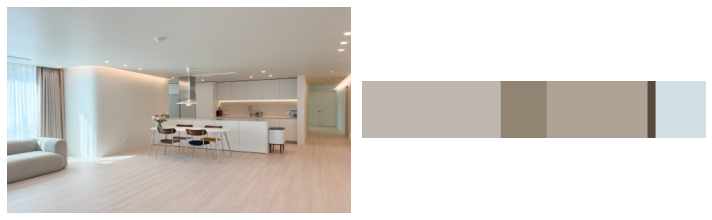

1
{0: 0.2, 1: 0.2, 2: 0.29, 3: 0.1, 4: 0.21}
['235, 232, 227', '151, 121, 86', '208, 196, 184', '97, 81, 56', '178, 159, 138']


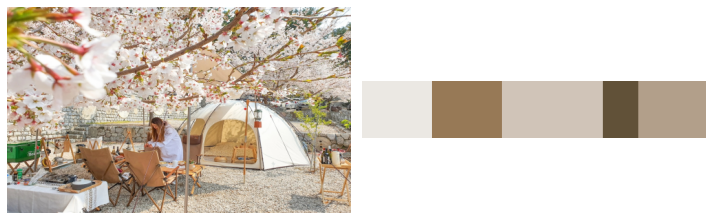

2
{0: 0.23, 1: 0.21, 2: 0.2, 3: 0.27, 4: 0.09}
['166, 172, 166', '118, 89, 71', '142, 132, 115', '196, 207, 204', '62, 42, 35']


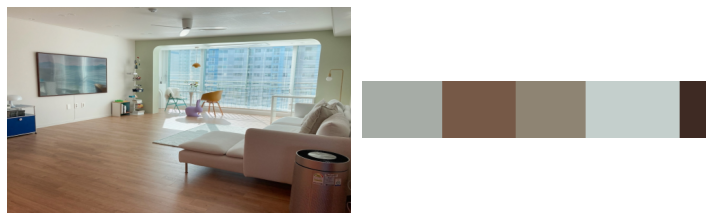

3
{0: 0.32, 1: 0.19, 2: 0.05, 3: 0.34, 4: 0.1}
['231, 230, 210', '190, 183, 150', '100, 100, 42', '216, 208, 175', '161, 148, 106']


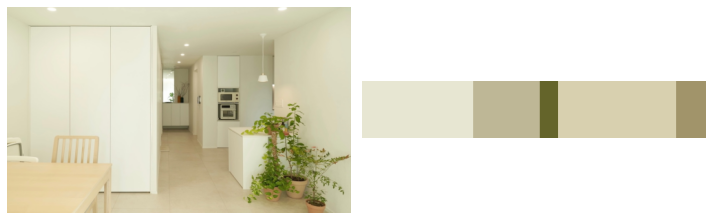

4
{0: 0.24, 1: 0.17, 2: 0.16, 3: 0.26, 4: 0.17}
['242, 242, 240', '120, 70, 31', '147, 142, 128', '198, 192, 179', '163, 101, 52']


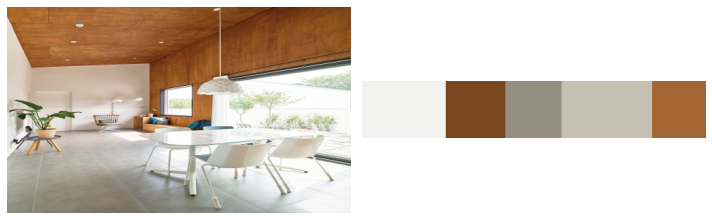

5


In [4]:
from skimage import io
from sklearn.cluster import KMeans
from collections import Counter

progress = 0
resultList=[]
titleList = []
colorList1 = []
colorList2 = [] 
colorList3 = []
colorList4 = []
colorList5 = []
ratioList = []
urlList = []
for i in range(5):
    try:
        # Ïù¥ÎØ∏ÏßÄ ÏùΩÍ∏∞
        image = cv.imread("interiorImg/interior" +str(i) +".jpg")

        # openCVÎäî Ïù¥ÎØ∏ÏßÄÎ•º BGRÎ∞©ÏãùÏúºÎ°ú ÏùΩÏñ¥ÏôÄÏÑú RGBÎ∞©ÏãùÏúºÎ°ú Î∞îÍøîÏ§ÄÎã§.
        img = cv.cvtColor(image, cv.COLOR_BGR2RGB)

        # ÏßÑÌñâ ÏÉÅÌô©
        progress += 1
        #Í∞ÄÎ°ú, ÏÑ∏Î°ú Í∏∏Ïù¥
        dim = (500, 300)
        # Ïù¥ÎØ∏ÏßÄ ÏÇ¨Ïù¥Ï¶àÎ•º Î≥ÄÍ≤Ω(ÌôïÎåÄ, Ï∂ïÏÜå Îì±)
        img = cv.resize(img, dim, interpolation = cv.INTER_AREA)
        # 3Ïó¥Ïù¥ ÎêòÎèÑÎ°ù Í∞ÄÎ≥ÄÏ†ÅÏúºÎ°ú ÏÑ§Ï†ï
        img.reshape(-1, 3)
        #
        unique, counts = np.unique(img.reshape(-1, 3), axis=0, return_counts=True)

        clt = KMeans(n_clusters=5)
        clt.fit(img.reshape(-1, 3))

        clt.labels_

        clt.cluster_centers_

        def palette_perc(k_cluster):
            width = 300
            # ÎÜíÏù¥ 50, ÎÑàÎπÑÍ∞Ä 300 ÌîΩÏÖÄÏù∏ Ïù¥ÎØ∏ÏßÄÏóê ÏÉâ Í∑∏Î£πÏùÑ Î≥¥Ïó¨Ï£ºÍ≥† Í∞Å ÏÉâÏÉÅÍµ∞ÏùÑ ÌåîÎ†àÌä∏Ïóê Î≥¥Ïó¨Ï§å
            palette = np.zeros((50, width, 3), np.uint8) # uint8 0~255ÍπåÏßÄ Ïà´Ïûê
            
            n_pixels = len(k_cluster.labels_)
            counter = Counter(k_cluster.labels_) # clusterÏóê ÌîΩÏÖÄ Í∞úÏàòÎ•º ÏÑ∏Ïñ¥ Ï§å
            perc = {}
            for i in counter:
                perc[i] = np.round(counter[i]/n_pixels, 2)
            # ÎπÑÏú®ÏùÑ ÎîïÏÖîÎÑàÎ¶¨ ÌòïÌÉúÎ°ú Î∞îÍøîÏ§ÄÎã§
            perc = dict(sorted(perc.items()))
            # ÎπÑÏú®Ïóê ÏâºÌëúÎ•º Î∂ÄÏó¨Ìï¥ Ï§å
            percStr = str(perc[0])+", " +str(perc[1])+", " +str(perc[2])+", " +str(perc[3])+", " +str(perc[4])
            ratioList.append(percStr)
            print(perc)

            result = ""
            for i in range(0, 5):
                for k in range(0, 3):
                    # rgbÍ∞í ÏÜåÏàòÏ†ê Ï†úÍ±∞
                    result += ", " + str(math.trunc(k_cluster.cluster_centers_[i][k]))
                result = result[2:]
                resultList.append(result)
                result = ""
            print(resultList)   
            step = 0
            # Í∞Å Íµ∞ÏßëÏùò ÌèâÍ∑† Í∞íÏùÑ Î∞òÎ≥µÌï¥ÏÑú ÎèåÎ†§Ï§ÄÎã§.
            for idx, centers in enumerate(k_cluster.cluster_centers_): 
                # ÌåîÎ†àÌä∏ rgbÍ∞í
                palette[:, step:int(step + perc[idx]*width+1), :] = centers
                step += int(perc[idx]*width+1)
            return palette
        # Îç∞Ïù¥ÌÑ∞Î•º ÌõàÎ†®ÌïúÎã§.
        clt_1 = clt.fit(img.reshape(-1, 3))
        # Ïù¥ÎØ∏ÏßÄÎ•º Î≥¥Ïó¨Ï§å
        show_img_compar(img, palette_perc(clt_1))
        
        titleList.append(pn.loc[:, 'Ïù¥Î¶Ñ'][i])
        colorList1.append(resultList[0])
        colorList2.append(resultList[1])
        colorList3.append(resultList[2])
        colorList4.append(resultList[3])
        colorList5.append(resultList[4])
        urlList.append(pn.loc[:, 'Ïù¥ÎØ∏ÏßÄ'][i])
        print(progress)
        resultList=[]
    except:
        print("ÏóêÎü¨ Ï≤òÎ¶¨")

In [8]:
dic = {'i_name':titleList, 'i_ratio':ratioList, 'i_rgb1' : colorList1, 'i_rgb2' : colorList2, 'i_rgb3': colorList3, 'i_rgb4' : colorList4, 'i_rgb5' : colorList5, 'i_url' : urlList}
Loc = pd.DataFrame(dic)
Loc

i_name                       i_ratio  \
0       Í≥°ÏÑ†Í≥º ÏßÅÏÑ†Ïùò Ï°∞Ìôî, ÌôàÏò§ÌîºÏä§Î•º ÌíàÏùÄ Ïã¨ÌîåÌïú Ïã†ÌòºÏßë   0.4, 0.02, 0.16, 0.29, 0.13   
1        Î¥ÑÏóêÎäî Ïó≠Ïãú Î≤öÍΩÉ Ï∫†Ìïëüå∏ ÏÇ¨Í≥ÑÏ†à Í∞êÏÑ± Ï∫†Ìïë ÏãúÏûë!     0.21, 0.2, 0.2, 0.1, 0.29   
2     Ïö∞Îìú Î∞îÌÉïÏóê Ïú†ÎãàÌÅ¨ Ïª¨Îü¨ ÎçîÌïòÍ∏∞, Îß§Î†•ÎßåÏ†ê ÌïòÏö∞Ïä§ ÏôÑÏÑ±   0.2, 0.23, 0.09, 0.27, 0.21   
3     Î¨¥Î™∞Îî©&ÌÉÄÏùºÏãúÍ≥µÏúºÎ°ú Íµ∞ÎçîÎçîÍ∏∞ ÏóÜÏù¥ ÍπîÎÅîÌïú 18Ìèâ ÏïÑÌååÌä∏   0.34, 0.1, 0.32, 0.05, 0.19   
4            Ïã§Í±∞Ï£º Ïßë, ÏàôÏÜå, Î¨∏Ìôî Í≥µÍ∞ÑÏùÑ Ìïú ÏûêÎ¶¨Ïóê  0.18, 0.26, 0.24, 0.16, 0.16   
...                              ...                           ...   
3424              Ï†úÏ£º, Í∑∏Î¶¨Í≥† Ïö∞Î¶¨ ÏÖã ÏÇ∂Ïùò Í≥µÍ∞Ñ  0.15, 0.25, 0.15, 0.17, 0.28   
3425        Ïö∞Î¶¨ÏóêÍ≤å Íº≠ ÎßûÎäî Í≥≥, ÌñâÎ≥µÏùÑ ÏåìÏïÑÍ∞à Ïã†ÌòºÏßë  0.28, 0.11, 0.19, 0.05, 0.37   
3426             ÏïÑÏù¥Îì§Í≥ºÏùò Ï∂îÏñµÏúºÎ°ú Ï±ÑÏö¥ Îî∞ÎúªÌïú Ïßë  0.13, 0.27, 0.23, 0.16, 0.21   
3427               Ï∞®Í∞ÄÏö¥ ÏßëÏóê Ïò®Í∏∞Î•º Î∂àÏñ¥ÎÑ£Îäî Î≤ï  0.31, 0.22, 0.21, 0.13, 0.12   
3428     Ïò§ÎûòÎêú ÏïÑÌååÌä∏Ïùò Î≥ÄÏã†, Î∞òÎ†§Î¨òÎì§Í≥º Ïò® Í∞ÄÏ°±Ïùò ÎÇôÏõê  0.36, 0.13, 0.08, 0.26, 0.17   

             i_rgb1         i_rgb2         i_rgb3         i_rgb4  \
0     191, 184, 177     88, 73, 61  208, 223, 227  175, 162, 149   
1     177, 159, 138  235, 232, 227   152, 121, 87     98, 81, 56   
2     142, 132, 115  167, 172, 166     63, 42, 36  196, 207, 204   
3     215, 208, 175  160, 148, 106  231, 230, 210    99, 100, 42   
4      162, 101, 51  198, 192, 179  242, 242, 240  147, 142, 128   
...             ...            ...            ...            ...   
3424     70, 59, 53  206, 206, 209     24, 20, 19  149, 145, 143   
3425  246, 242, 236   130, 105, 82  191, 162, 132     63, 56, 49   
3426     69, 57, 42  207, 206, 197   120, 109, 94  249, 250, 247   
3427  227, 220, 211  173, 149, 122  205, 188, 168   134, 110, 84   
3428  176, 172, 169    106, 91, 80     40, 30, 27  197, 203, 207   

             i_rgb5                                              i_url  
0     146, 132, 115  https://image.ohou.se/i/bucketplace-v2-develop...  
1     208, 196, 183  https://image.ohou.se/i/bucketplace-v2-develop...  
2       118, 89, 71  https://image.ohou.se/i/bucketplace-v2-develop...  
3     190, 182, 149  https://image.ohou.se/i/bucketplace-v2-develop...  
4       119, 69, 31  https://image.ohou.se/i/bucketplace-v2-develop...  
...             ...                                                ...  
3424    112, 90, 70  https://image.ohou.se/i/bucketplace-v2-develop...  
3425  222, 207, 188  https://image.ohou.se/i/bucketplace-v2-develop...  
3426  174, 168, 155  https://image.ohou.se/i/bucketplace-v2-develop...  
3427     95, 72, 48  https://image.ohou.se/i/bucketplace-v2-develop...  
3428  141, 133, 127  https://image.ohou.se/i/bucketplace-v2-develop...  

[3429 rows x 8 columns]

In [9]:
Loc.to_csv("Ïù∏ÌÖåÎ¶¨Ïñ¥ÏÉâÏÉÅÏ∂îÍ∞Ä_ÏµúÏ¢Ö.csv", encoding="utf-8-sig")

# ÏÉâÏÉÅ Î∂ÑÎ•ò

In [5]:
# csv ÏùΩÏñ¥Ïò§Í∏∞
a = pd.read_csv('colorÏ∂îÍ∞Ä.csv')

In [6]:
# rgbÍ∞íÏùÑ trainÍ≥º testÎ°ú Î∂ÑÎ•ò
train = a.iloc[:, 2:5]
test = a.iloc[:, 5]

In [7]:
from sklearn.neighbors import KNeighborsClassifier

In [8]:
# Ïù¥ÏõÉÏùÑ 1Î°ú ÏÑ§Ï†ïÌï¥ÏÑú Í∞ÄÏû• Í∑ºÏ†ëÌïú Í≤ÉÎßå Î∂àÎü¨Ïò§Í∏∞
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(train,test)

KNeighborsClassifier(n_neighbors=1)

In [10]:
knn.score(train, test)

0.9741935483870968

In [8]:
import warnings

In [9]:
# Í≤ΩÍ≥†Ï∞Ω Î¨¥ÏãúÌïòÍ∏∞
warnings.filterwarnings('ignore')

In [15]:
# ÌïôÏäµ Îç∞Ïù¥ÌÑ∞ ÏòàÏ∏°ÌïòÍ∏∞
knn.predict([[100,22,35]])[0]

'Claret'

In [18]:
# ÌõàÎ†® Îç∞Ïù¥ÌÑ∞
origin = pd.read_csv('Ïù∏ÌÖåÎ¶¨Ïñ¥ÏÉâÏÉÅÏ∂îÍ∞Ä_ÏµúÏ¢Ö.csv',encoding = 'utf-8-sig')

In [19]:
# Ïã§Ïäµ Îç∞Ïù¥ÌÑ∞
test = pd.read_csv('ÏÉâÏÉÅÏ∂îÍ∞Ätest_ÏµúÏ¢Ö.csv',encoding = 'euc-kr')

In [20]:
rgb1 = test.loc[:,'1r':'1b']

rgb2 = test.loc[:,'2r':'2b']

rgb3 = test.loc[:,'3r':'3b']

rgb4 = test.loc[:,'4r':'4b']

rgb5 = test.loc[:,'5r':'5b']

In [21]:
# ÏòàÏ∏°ÌïòÍ∏∞
result1 = pd.DataFrame(knn.predict(rgb1))

result2 = pd.DataFrame(knn.predict(rgb2))

result3 = pd.DataFrame(knn.predict(rgb3))

result4 = pd.DataFrame(knn.predict(rgb4))

result5 = pd.DataFrame(knn.predict(rgb5))

In [22]:
# concat : Îç∞Ïù¥ÌÑ∞ÌîÑÎ†àÏûÑ Í≤∞Ìï©
final_result = pd.concat([origin,result1,result2,result3,result4,result5],axis = 1)

In [23]:
final_result.columns = ['Unnamed: 0',     'i_name',    'i_ratio',     'i_rgb1',     'i_rgb2',
           'i_rgb3',     'i_rgb4',     'i_rgb5',      'i_url',            1,
                  2,            3,            4,            5]

In [24]:
final_result[['Unnamed: 0',     'i_name',    'i_ratio',     'i_rgb1',1,     'i_rgb2',
           'i_rgb3',     'i_rgb4',     'i_rgb5',      'i_url']]

Unnamed: 0                          i_name  \
0              0    Í≥°ÏÑ†Í≥º ÏßÅÏÑ†Ïùò Ï°∞Ìôî, ÌôàÏò§ÌîºÏä§Î•º ÌíàÏùÄ Ïã¨ÌîåÌïú Ïã†ÌòºÏßë   
1              1     Î¥ÑÏóêÎäî Ïó≠Ïãú Î≤öÍΩÉ Ï∫†Ìïëüå∏ ÏÇ¨Í≥ÑÏ†à Í∞êÏÑ± Ï∫†Ìïë ÏãúÏûë!   
2              2  Ïö∞Îìú Î∞îÌÉïÏóê Ïú†ÎãàÌÅ¨ Ïª¨Îü¨ ÎçîÌïòÍ∏∞, Îß§Î†•ÎßåÏ†ê ÌïòÏö∞Ïä§ ÏôÑÏÑ±   
3              3  Î¨¥Î™∞Îî©&ÌÉÄÏùºÏãúÍ≥µÏúºÎ°ú Íµ∞ÎçîÎçîÍ∏∞ ÏóÜÏù¥ ÍπîÎÅîÌïú 18Ìèâ ÏïÑÌååÌä∏   
4              4         Ïã§Í±∞Ï£º Ïßë, ÏàôÏÜå, Î¨∏Ìôî Í≥µÍ∞ÑÏùÑ Ìïú ÏûêÎ¶¨Ïóê   
...          ...                             ...   
3424        3424              Ï†úÏ£º, Í∑∏Î¶¨Í≥† Ïö∞Î¶¨ ÏÖã ÏÇ∂Ïùò Í≥µÍ∞Ñ   
3425        3425        Ïö∞Î¶¨ÏóêÍ≤å Íº≠ ÎßûÎäî Í≥≥, ÌñâÎ≥µÏùÑ ÏåìÏïÑÍ∞à Ïã†ÌòºÏßë   
3426        3426             ÏïÑÏù¥Îì§Í≥ºÏùò Ï∂îÏñµÏúºÎ°ú Ï±ÑÏö¥ Îî∞ÎúªÌïú Ïßë   
3427        3427               Ï∞®Í∞ÄÏö¥ ÏßëÏóê Ïò®Í∏∞Î•º Î∂àÏñ¥ÎÑ£Îäî Î≤ï   
3428        3428     Ïò§ÎûòÎêú ÏïÑÌååÌä∏Ïùò Î≥ÄÏã†, Î∞òÎ†§Î¨òÎì§Í≥º Ïò® Í∞ÄÏ°±Ïùò ÎÇôÏõê   

                           i_ratio         i_rgb1             1  \
0      0.4, 0.02, 0.16, 0.29, 0.13  191, 184, 177        Silver   
1        0.21, 0.2, 0.2, 0.1, 0.29  177, 159, 138         Nobel   
2      0.2, 0.23, 0.09, 0.27, 0.21  142, 132, 115  Almond Frost   
3      0.34, 0.1, 0.32, 0.05, 0.19  215, 208, 175   Desert Sand   
4     0.18, 0.26, 0.24, 0.16, 0.16   162, 101, 51  Coyote Brown   
...                            ...            ...           ...   
3424  0.15, 0.25, 0.15, 0.17, 0.28     70, 59, 53      Espresso   
3425  0.28, 0.11, 0.19, 0.05, 0.37  246, 242, 236       Saltpan   
3426  0.13, 0.27, 0.23, 0.16, 0.21     69, 57, 42      Espresso   
3427  0.31, 0.22, 0.21, 0.13, 0.12  227, 220, 211    Timberwolf   
3428  0.36, 0.13, 0.08, 0.26, 0.17  176, 172, 169       Martini   

             i_rgb2         i_rgb3         i_rgb4         i_rgb5  \
0        88, 73, 61  208, 223, 227  175, 162, 149  146, 132, 115   
1     235, 232, 227   152, 121, 87     98, 81, 56  208, 196, 183   
2     167, 172, 166     63, 42, 36  196, 207, 204    118, 89, 71   
3     160, 148, 106  231, 230, 210    99, 100, 42  190, 182, 149   
4     198, 192, 179  242, 242, 240  147, 142, 128    119, 69, 31   
...             ...            ...            ...            ...   
3424  206, 206, 209     24, 20, 19  149, 145, 143    112, 90, 70   
3425   130, 105, 82  191, 162, 132     63, 56, 49  222, 207, 188   
3426  207, 206, 197   120, 109, 94  249, 250, 247  174, 168, 155   
3427  173, 149, 122  205, 188, 168   134, 110, 84     95, 72, 48   
3428    106, 91, 80     40, 30, 27  197, 203, 207  141, 133, 127   

                                                  i_url  
0     https://image.ohou.se/i/bucketplace-v2-develop...  
1     https://image.ohou.se/i/bucketplace-v2-develop...  
2     https://image.ohou.se/i/bucketplace-v2-develop...  
3     https://image.ohou.se/i/bucketplace-v2-develop...  
4     https://image.ohou.se/i/bucketplace-v2-develop...  
...                                                 ...  
3424  https://image.ohou.se/i/bucketplace-v2-develop...  
3425  https://image.ohou.se/i/bucketplace-v2-develop...  
3426  https://image.ohou.se/i/bucketplace-v2-develop...  
3427  https://image.ohou.se/i/bucketplace-v2-develop...  
3428  https://image.ohou.se/i/bucketplace-v2-develop...  

[3429 rows x 10 columns]

In [25]:
# Í≤∞Í≥ºÎ¨º
final_result.to_csv("ÏÉâÏÉÅÏ∂îÍ∞ÄopenCV_ÏµúÏ¢Ö.csv", encoding="utf-8-sig")